In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangluru-house-dataset/cleaned_data.csv
/kaggle/input/bangluru-house-dataset/bengaluru_house_prices.csv


In [5]:
import pandas as pd 
df= pd.read_csv("/kaggle/input/bangluru-house-dataset/bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
#Dropping irrevelent columns
df=df.drop(['area_type','availability', 'society'], axis='columns')


In [7]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df.shape

(13320, 6)

In [9]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
df.dropna(inplace= True)

In [11]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df.shape

(12710, 6)

In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [14]:
df['bhk']= df['size'].apply(lambda x: int(x.split(" ")[0]))

In [15]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [16]:
df['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [17]:
df[df['bhk']>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [18]:
df.drop(['balcony'], axis=1)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [21]:
#converting sqft in float
def convert_sqft(x):
    tokens= x.split("-")
    if(len(tokens)==2):
        return (float(tokens[0])+ float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
        

In [22]:
df1= df.copy()
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [23]:
df1['total_sqft']=df1['total_sqft'].apply(convert_sqft)
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [24]:
#Find price per square feet
df1['price_per_sqft']= df1['price']*100000/df1['total_sqft']
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [25]:
len(df1['location'].unique())

1265

In [26]:
df1['location']= df1['location'].apply(lambda x: x.strip())
location_stats= df1.groupby("location")['location'].agg('count').sort_values(ascending= False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [27]:
location_stats[location_stats<15]

location
Kodihalli               14
Giri Nagar              14
Sarakki Nagar           14
Judicial Layout         14
NRI Layout              14
                        ..
Kanakapura  Rod          1
Kanakapura Main Road     1
Kanakapura Road          1
Kanakapura Road,         1
whitefiled               1
Name: location, Length: 1074, dtype: int64

In [28]:
location_stats_less_than15= location_stats[location_stats<15]

In [29]:
#Removing locations which have less than 15 entries 
df1['location']= df1['location'].apply(lambda x: 'other' if x in location_stats_less_than15 else x)

In [30]:
len(df1['location'].unique())

181

In [31]:
#Removing the entries where Total squarefeet per bhk is less than 300
df2= df1[~(df1['total_sqft']/df1['bhk']<300)]
df2.shape

(12055, 8)

In [32]:
df2.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
#Function for removing price per squarefeet outliers
import numpy as np
def remove_pps_outlier(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reducedDf= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out= pd.concat([reducedDf,df_out], ignore_index= True)
    return df_out    
        

In [34]:
df3= remove_pps_outlier(df2)
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,other,4 Bedroom,2600.0,5.0,3.0,120.0,4,4615.384615
1,other,3 BHK,2770.0,4.0,2.0,290.0,3,10469.314079
2,other,2 BHK,1100.0,2.0,2.0,48.0,2,4363.636364
3,other,3 BHK,1250.0,3.0,2.0,56.0,3,4480.000000
4,other,1 BHK,600.0,1.0,0.0,38.0,1,6333.333333


In [35]:
df3.shape

(9956, 8)

In [36]:
#Droping the balcony and size columns because it will not help for model training
df4= df3.drop(['balcony','size'], axis =1)

In [37]:
df4

,location,total_sqft,bath,price,bhk,price_per_sqft
0,other,2600.0,5.0,120.0,4,4615.384615
1,other,2770.0,4.0,290.0,3,10469.314079
2,other,1100.0,2.0,48.0,2,4363.636364
3,other,1250.0,3.0,56.0,3,4480.000000
4,other,600.0,1.0,38.0,1,6333.333333
...,...,...,...,...,...,...
9951,1st Phase JP Nagar,2077.0,3.0,175.0,3,8425.613866
9952,1st Phase JP Nagar,4550.0,2.0,240.0,4,5274.725275
9953,1st Phase JP Nagar,1205.0,2.0,85.0,2,7053.941909
9954,1st Phase JP Nagar,2615.0,5.0,222.0,4,8489.483748


In [38]:
#Eleminating the entries where no of bathrooms are greater than bhk+2
df5= df4[df4.bath< df4.bhk+2]
df5

,location,total_sqft,bath,price,bhk,price_per_sqft
0,other,2600.0,5.0,120.0,4,4615.384615
1,other,2770.0,4.0,290.0,3,10469.314079
2,other,1100.0,2.0,48.0,2,4363.636364
3,other,1250.0,3.0,56.0,3,4480.000000
4,other,600.0,1.0,38.0,1,6333.333333
...,...,...,...,...,...,...
9951,1st Phase JP Nagar,2077.0,3.0,175.0,3,8425.613866
9952,1st Phase JP Nagar,4550.0,2.0,240.0,4,5274.725275
9953,1st Phase JP Nagar,1205.0,2.0,85.0,2,7053.941909
9954,1st Phase JP Nagar,2615.0,5.0,222.0,4,8489.483748


In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
#Function for visualizing the price vs total squarefit data
def plot_chart(df,location):
    bhk2= df[(df.location== location) &(df.bhk==2)]
    bhk3= df[(df.location== location) & (df.bhk==3)]
    
    plt.scatter(bhk2.total_sqft,bhk2.price, marker="+", color='blue', label='2BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, color='green', label='3BHK', s=50)
    plt.xlabel("Total Sqft Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

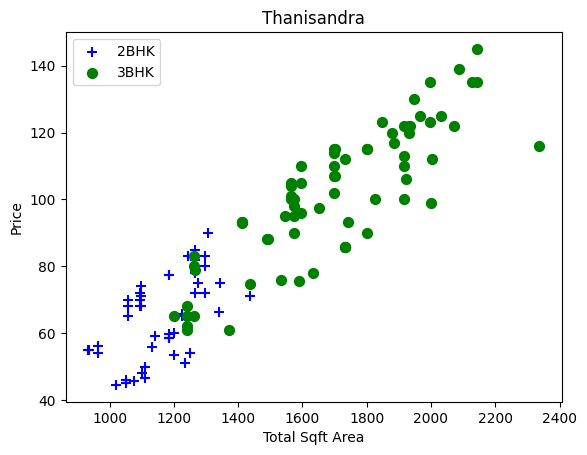

In [41]:
plot_chart(df5,"Thanisandra" )

In [42]:
#Function for removing entries which are not matching with their price
def remove_bhk_outlier(df):
    excludes_index=np.array([])
    for location , locationdf in df.groupby('location'):
        bhk_stats={}
        for bhk, bhkdf in locationdf.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhkdf.price_per_sqft),
                'std': np.std(bhkdf.price_per_sqft),
                'count':bhkdf.shape[0]
            }
        for bhk, bhkdf in locationdf.groupby('bhk'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                excludes_index= np.append(excludes_index, bhkdf[bhkdf.price_per_sqft <(stats['mean'])].index.values)
    return df.drop(excludes_index, axis='index')                
            

In [43]:
df6= remove_bhk_outlier(df5)

In [44]:
df5.shape


(9876, 6)

In [45]:
df6.shape

(6787, 6)

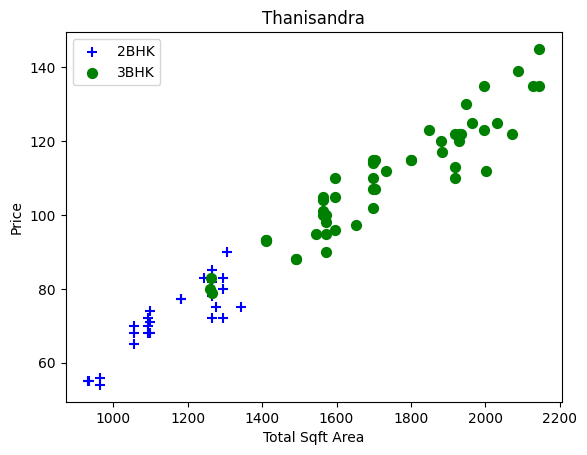

In [46]:
plot_chart(df6,"Thanisandra" )

In [47]:
#Making columns of Locations so that they will be accessable easily
dummies= pd.get_dummies(df6.location)
dummies

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9950,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9951,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9953,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
df7= pd.concat([df6,dummies.drop('other', axis= 1)], axis=1)

In [49]:
df7.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,other,2770.0,4.0,290.0,3,10469.314079,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,other,600.0,1.0,38.0,1,6333.333333,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,other,1500.0,2.0,185.0,2,12333.333333,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,other,840.0,2.0,45.0,2,5357.142857,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,other,4395.0,3.0,240.0,3,5460.750853,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
#Droping the columns which are not relevent for a traing dataset
df8= df7.drop(['location','price','price_per_sqft'], axis=1)

In [51]:
y= df7.price

In [52]:
df8

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,2770.0,4.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,600.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1500.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,840.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,4395.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,1180.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9950,1394.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9951,2077.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9953,1205.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test= train_test_split(df8, y, test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression
logr= LinearRegression()

In [55]:
#Training Model 
logr.fit(x_train, y_train)
logr.score(x_test, y_test)

0.7351599364614381

In [56]:
#Function for price prediction
def predict_price(location, sqft, bath, bhk):
    loc_index= np.where(df8.columns==location)[0][0]
    x=np.zeros(len(df8.columns))
    x[0]=sqft
    x[1]=bath
    x[2]= bhk
    if loc_index>0:
        x[loc_index]=1
    return logr.predict([x])[0]    

In [57]:
predict_price('Varthur', 1000, 2,2)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.00879808173914

In [58]:
#Downloading Colums as a JSON File
import json
columns={
    'data_columns': [col.lower() for col in df8.columns] 
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [60]:
#Downloading Model as a Pickle File
import pickle
filename = 'banglore_home_prices_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(logr, file)
